# 캐글 필사 중
# kaggle.com/ash316/eda-to-prediction-dietanic

# Part1: Exploratory Data Analysis(EDA)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv('./data/train.csv')

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone,Family_Size,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,"(7.91, 14.454]",1


In [52]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
Alone            0
Family_Size      0
Fare_Range       0
Fare_cat         0
dtype: int64

### How many Survived?

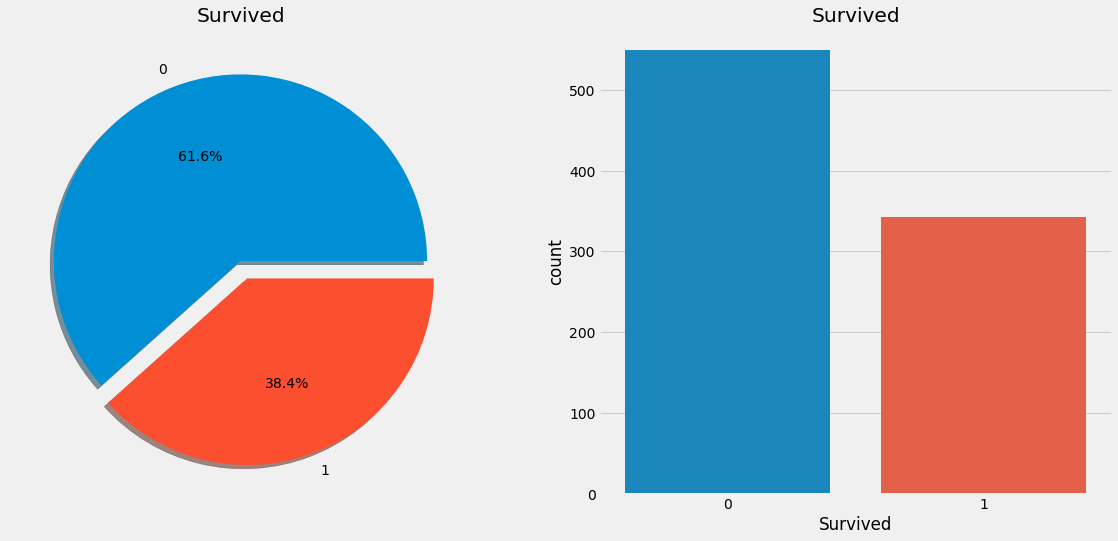

In [53]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# Types of features

### Categrical Features

### Orinal Features

# Analysing The Features

### Sex -> Categorical Feature

In [54]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

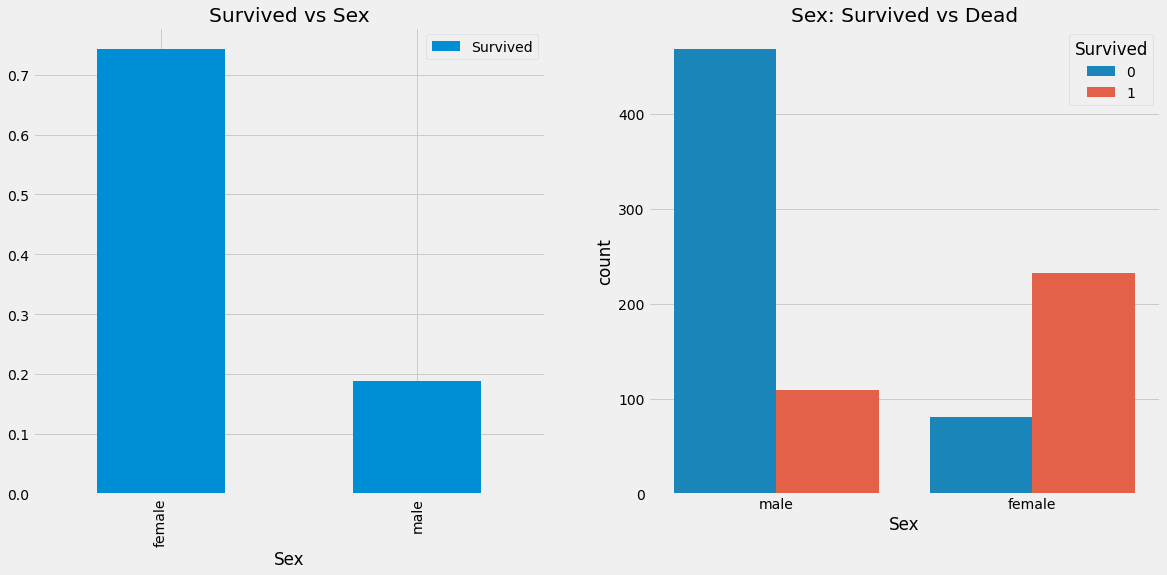

In [55]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

### Pclass -> ordinal Feature

In [56]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


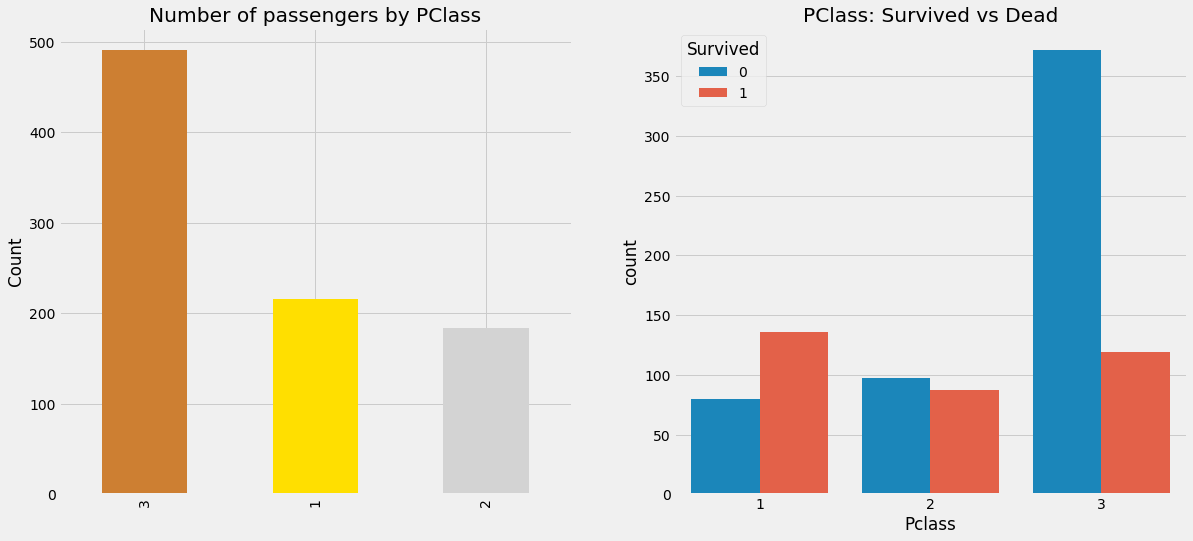

In [57]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers by PClass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('PClass: Survived vs Dead')
plt.show()

In [58]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

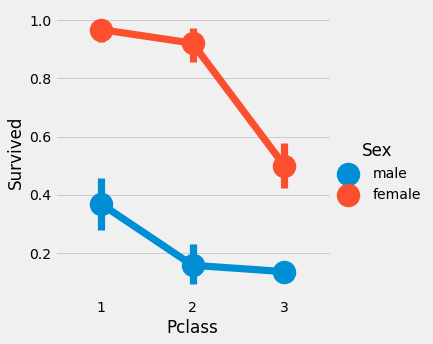

In [59]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

### Age -> Continous Feature

In [60]:
print('Oldest passenger was of: ', data['Age'].max(), 'Years')
print('Youngest passenger was of: ', data['Age'].min(), 'Years')
print('Average age on the ship: ', data['Age'].mean(), 'Years')

Oldest passenger was of:  80.0 Years
Youngest passenger was of:  0.42 Years
Average age on the ship:  29.69911764705882 Years


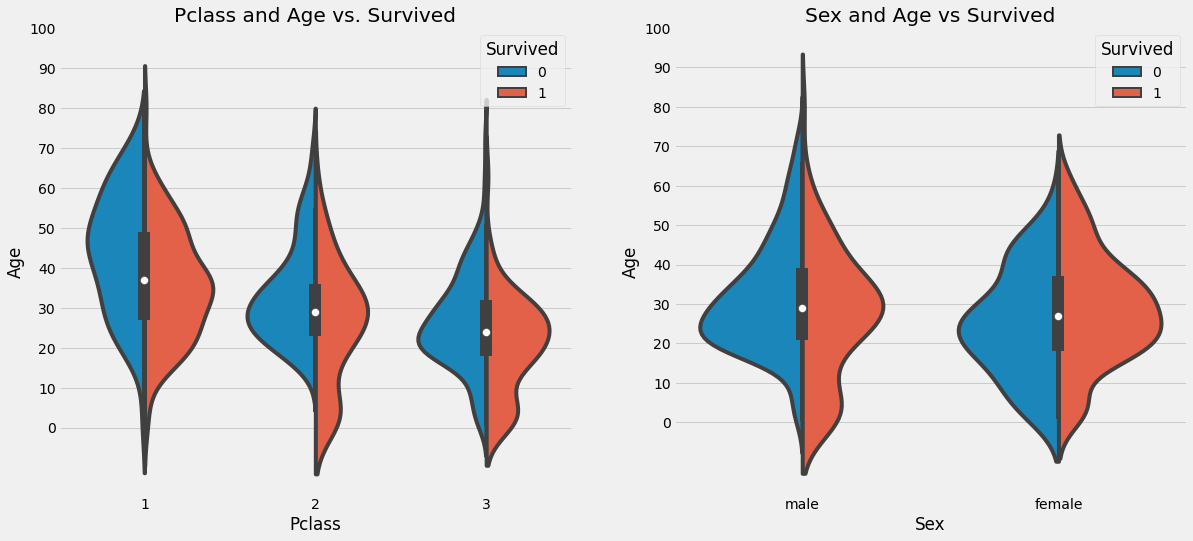

In [61]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [62]:
data['Initial']=0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # let's extract the Salutations

In [63]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [64]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs','Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [65]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

# Filling NaN Ages

In [66]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [67]:
data.Age.isnull().any()

False

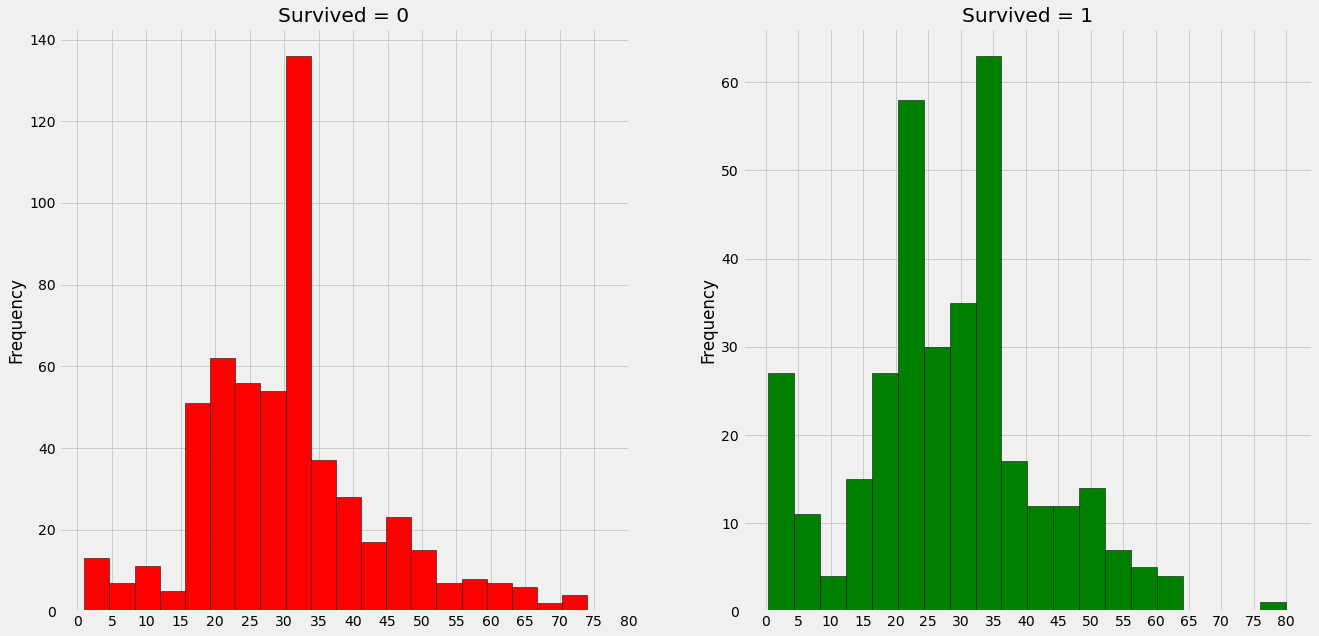

In [68]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived'] ==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

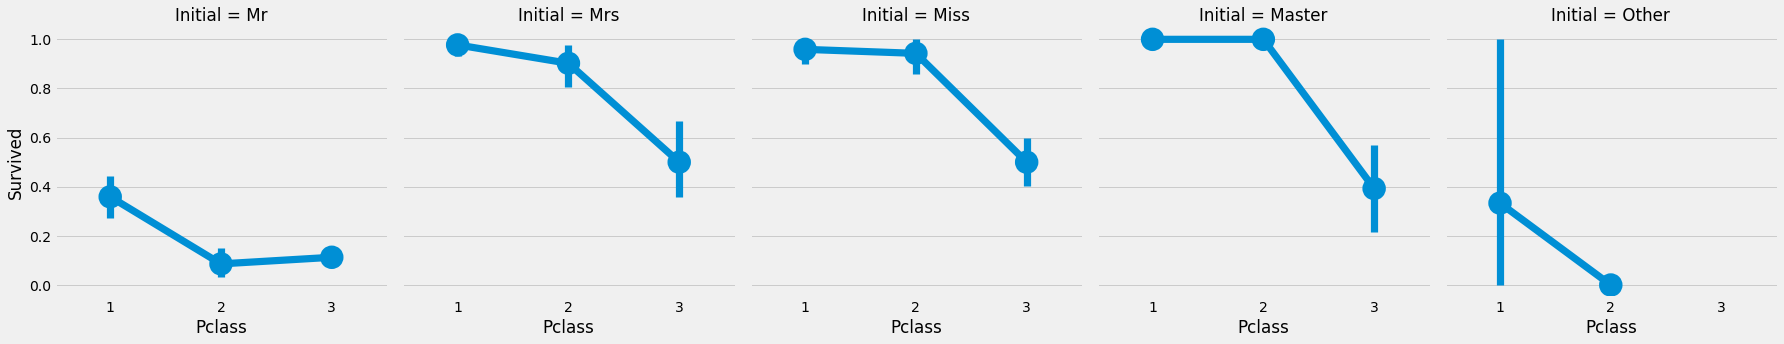

In [69]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

# Embarked -> Categorical Value

In [70]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

# Chances for Survival by Port of Embarkation

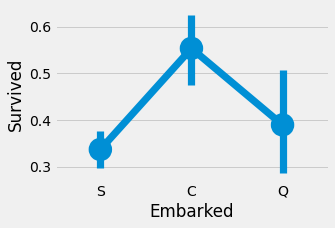

In [71]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

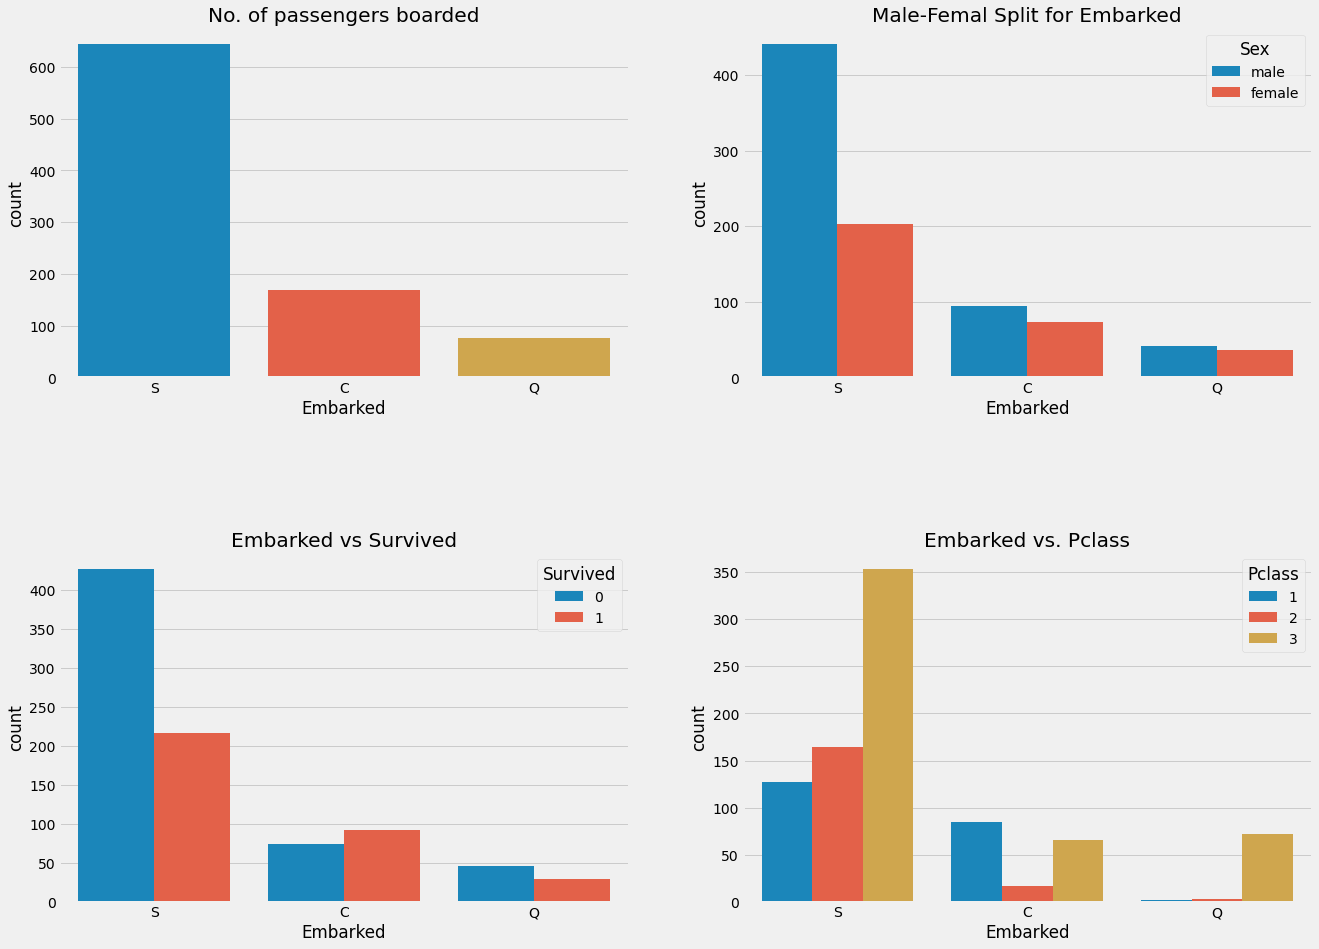

In [72]:
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of passengers boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Femal Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs. Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

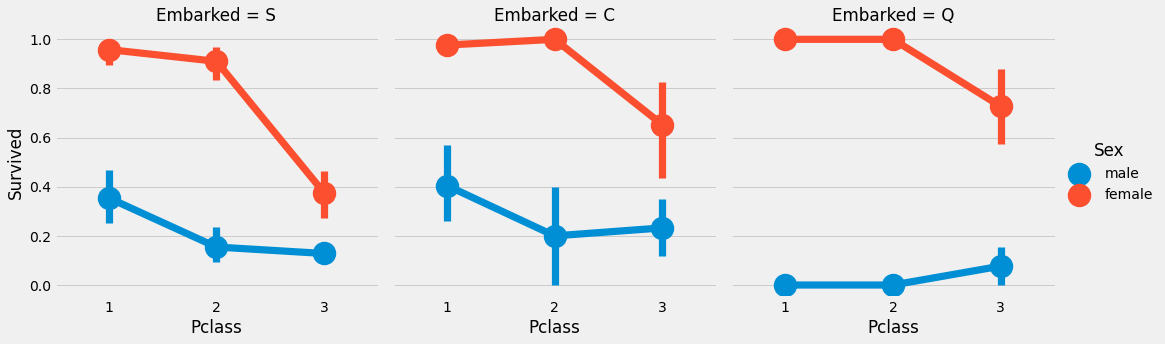

In [73]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

# Filling Embarked NaN
### As wee saw that maximum passengers boarded from Port S, we replace Nan with S.

In [74]:
data['Embarked'].fillna('S', inplace=True)

In [75]:
data.Embarked.isnull().any()

False

# SibSip -> Discrete Feature
### This feature represents whether a person is alone or with his family members
### Sibiling = brother, sister, stepbrother, stepsister
### Spouse = husband, wife

In [76]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


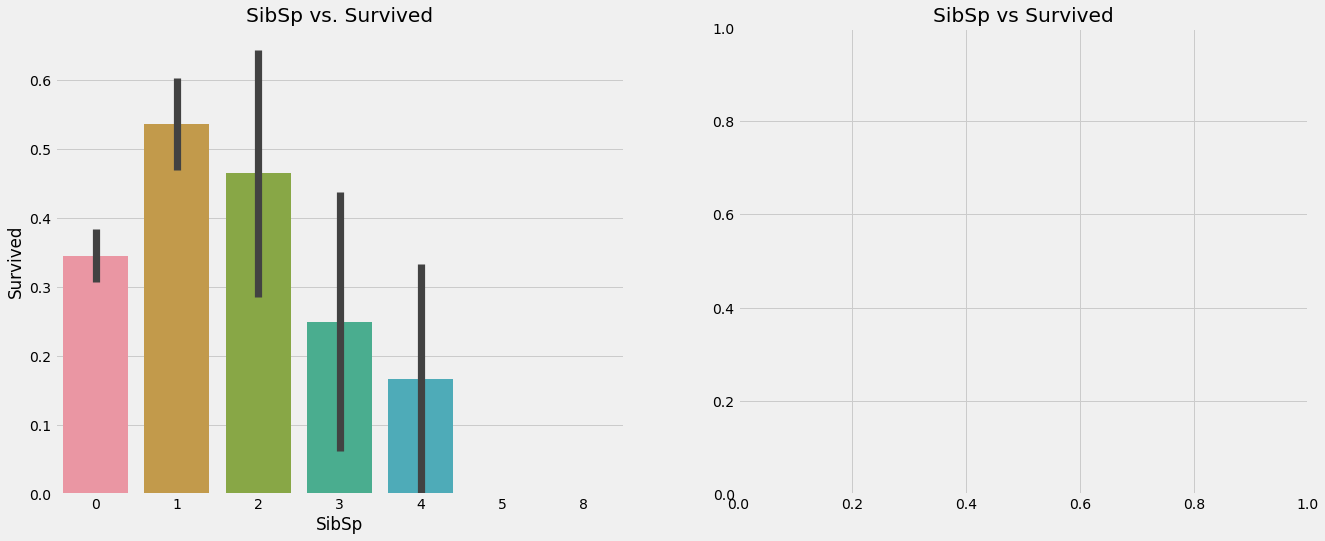

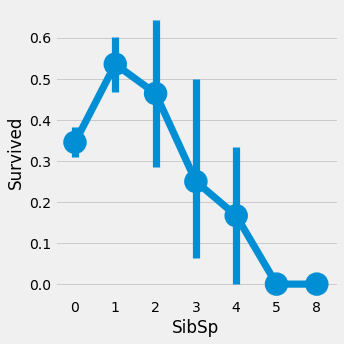

In [77]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [78]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Parch

In [79]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


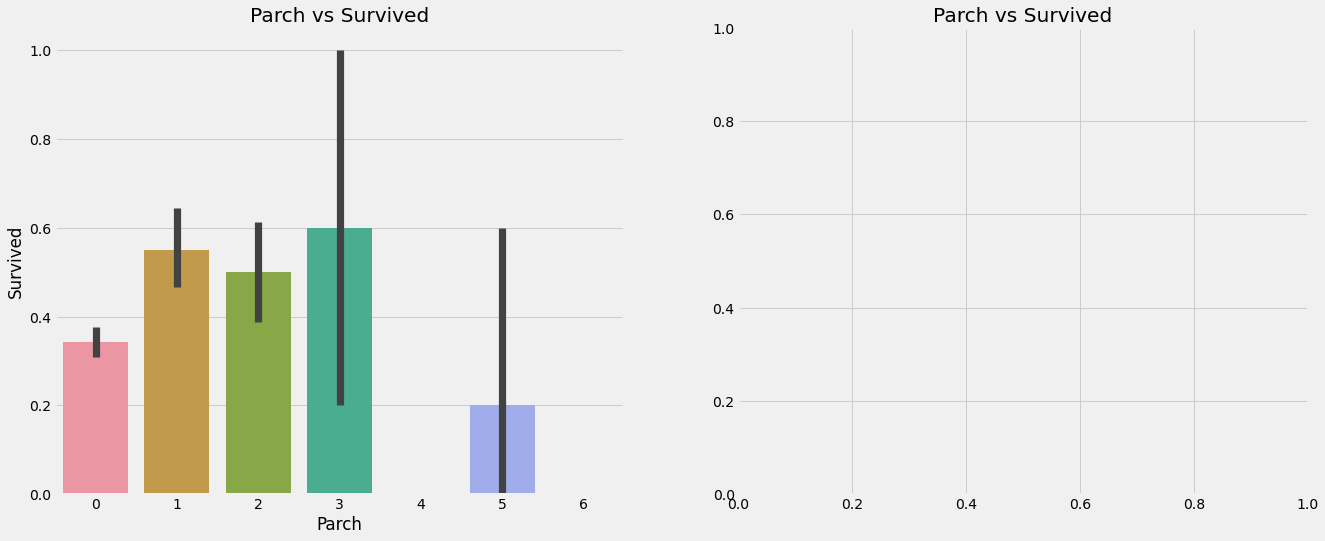

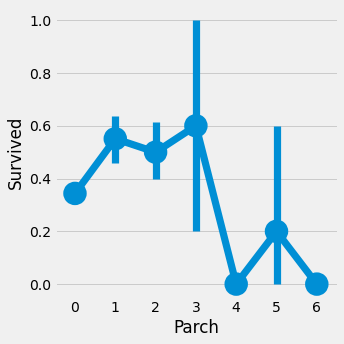

In [80]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

# Fare -> Continuous feature

In [81]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


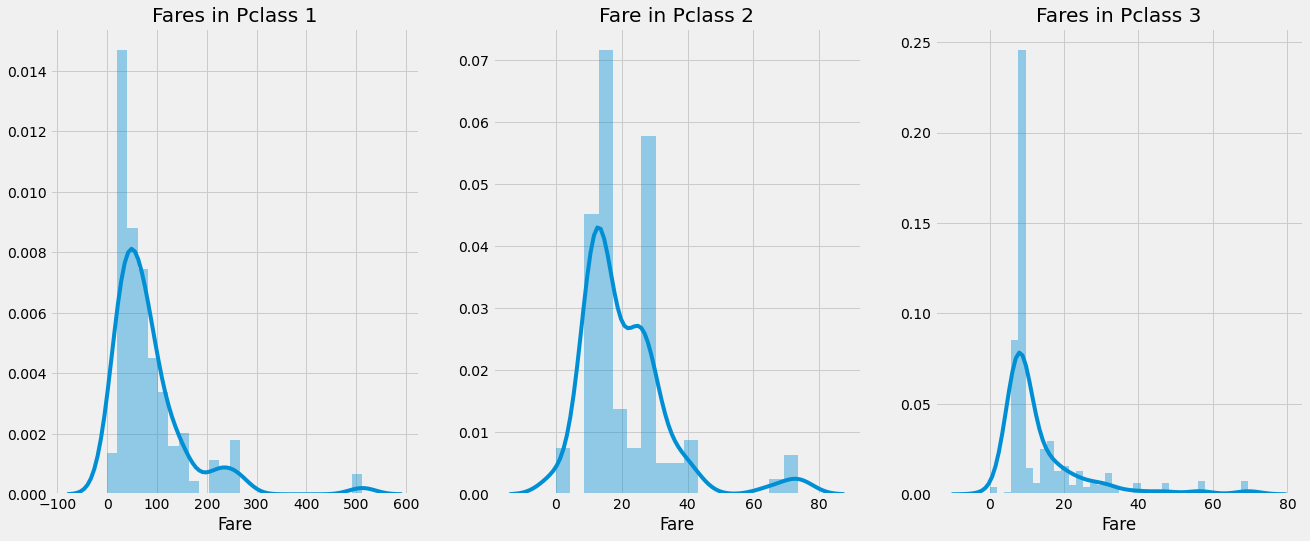

In [82]:
f, ax = plt.subplots(1,3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

# Observations in a Nutshell for all features

# Correlation between the features

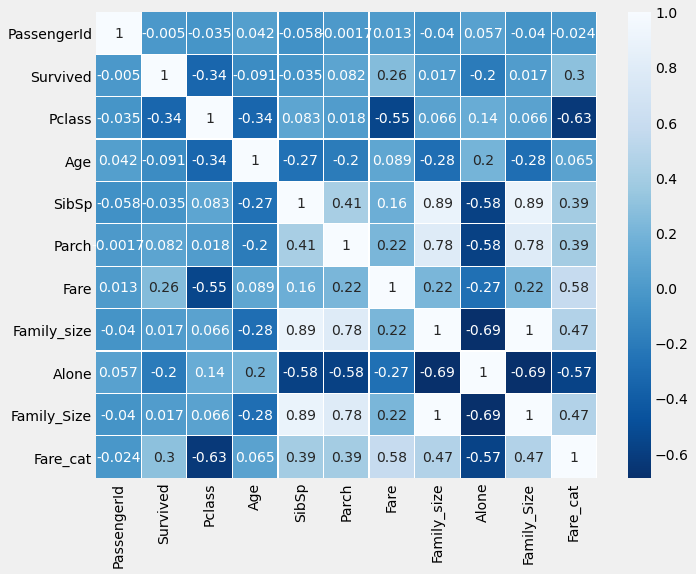

In [83]:
sns.heatmap(data.corr(), annot=True, cmap='Blues_r', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

# Part2: Feature engineering and data cleaning

# Age_band

In [84]:
data['Age_band'] = 0
data.loc[data['Age'] <=16, 'Age_band']=0
data.loc[(data['Age'] > 16 ) & (data['Age'] <= 32),'Age_band'] = 1
data.loc[(data['Age'] > 32 ) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48 ) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[(data['Age'] > 64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Alone,Family_Size,Fare_Range,Fare_cat,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,"(-0.001, 7.91]",0,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,"(31.0, 512.329]",3,Mrs,2


In [85]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


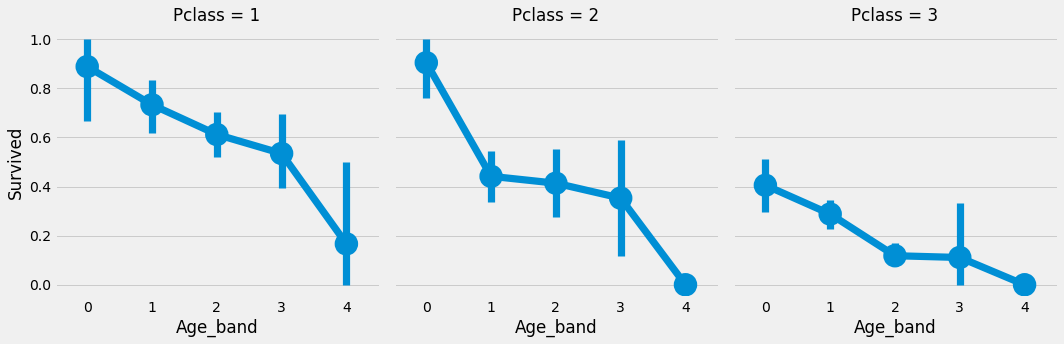

In [86]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

# Family_size and Alone

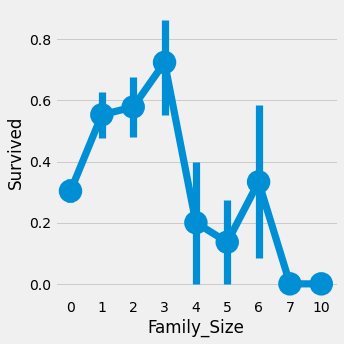

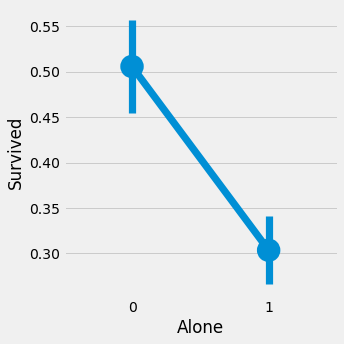

In [87]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs. Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs. Survived')
plt.close(1)
plt.show()

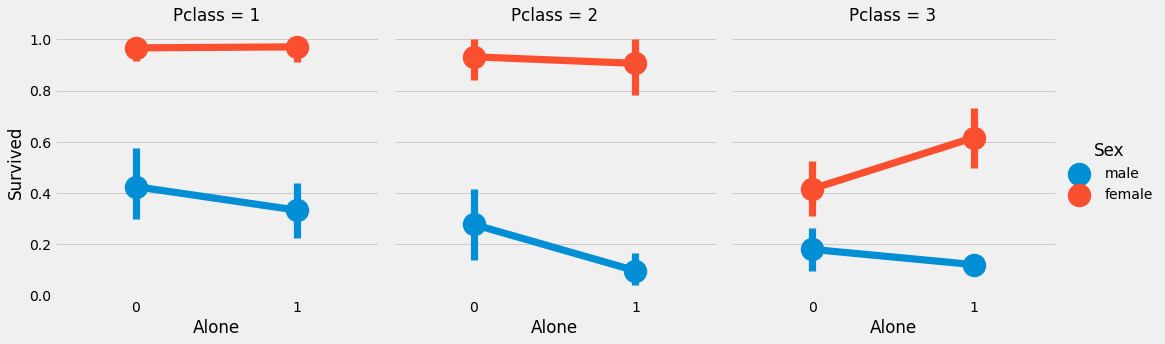

In [88]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

# Fare_Range

In [89]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [90]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare']<= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <=513), 'Fare_cat'] = 3

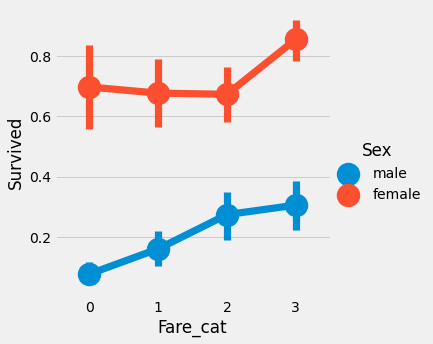

In [91]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

# Converting String value into numeric

In [93]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

In [96]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'Family_size', 'Alone', 'Family_Size', 'Fare_cat', 'Initial',
       'Age_band'],
      dtype='object')

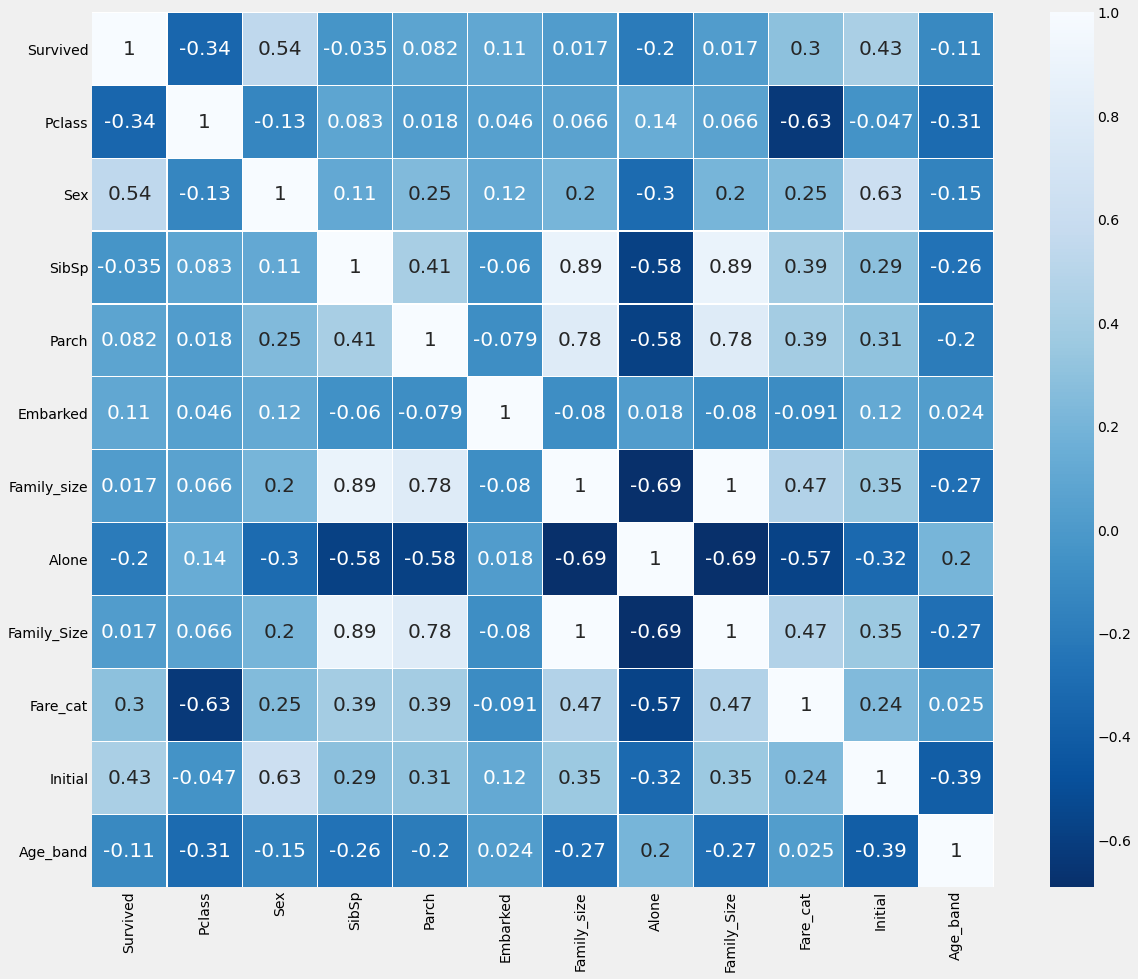

In [99]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='Blues_r', linewidths=0.2, annot_kws={'size' : 20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

In [100]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Radial Support Vector Machines(rbf-SVM)

In [102]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


# Linear Support Vector Machine(Linear-SVM)

In [103]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


# Logistic Regression

In [105]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy for the Logistic Regression is  0.8134328358208955


# Decision Tree

In [107]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print('Accuracy for the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy for the Logistic Regression is  0.8059701492537313


# K-Nearest Neighbours(KNN)

In [116]:
model=KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5=model.predict(test_X)
print('Accuracy for the K-Nearest Neighbours is ', metrics.accuracy_score(prediction5, test_Y))

Accuracy for the K-Nearest Neighbours is  0.8208955223880597


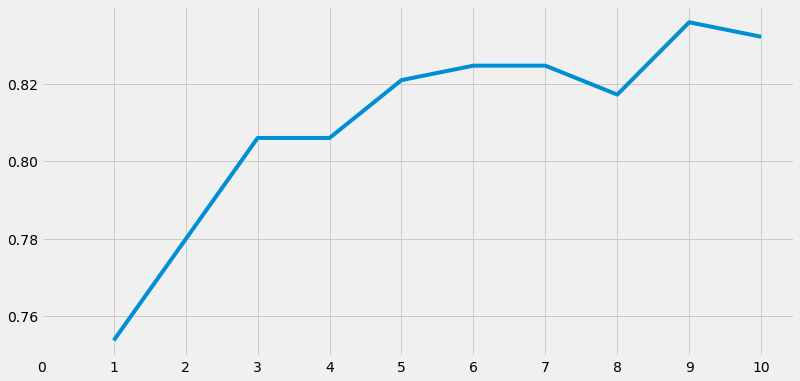

Accuracies for different values of n are:  [0.75373134 0.77985075 0.80597015 0.80597015 0.82089552 0.82462687
 0.82462687 0.81716418 0.8358209  0.83208955]  with the max value as  0.835820895522388


In [115]:
a_index = list(range(1,11))
a = pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are: ', a.values, ' with the max value as ', a.values.max())

# Gaussian Naive Bayes

In [120]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print( 'The accuracy of the Naive Bayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the Naive Bayes is  0.8208955223880597


# Random Forest

In [121]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of Random Forest is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of Random Forest is  0.8208955223880597


# Cross Validaton

In [124]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22)

xyz=[]
accuracy=[]
std=[]

classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=10)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.811548,0.040685
Decision Tree,0.808115,0.028790
Naive Bayes,0.799139,0.028314
Random Forest,0.802547,0.038111


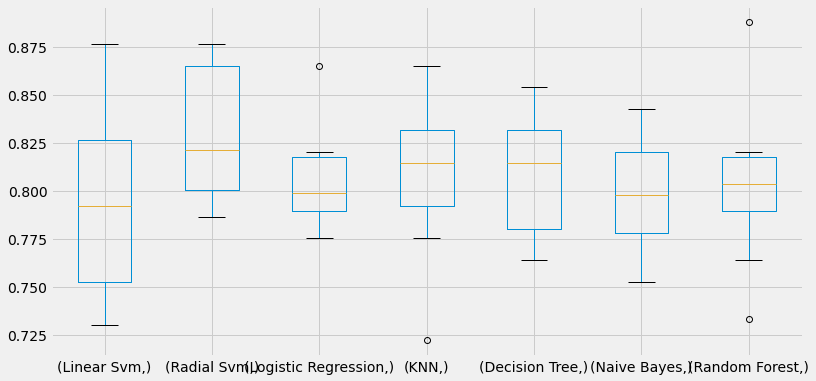

In [125]:
plt.subplots(figsize=(12, 6))
box= pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

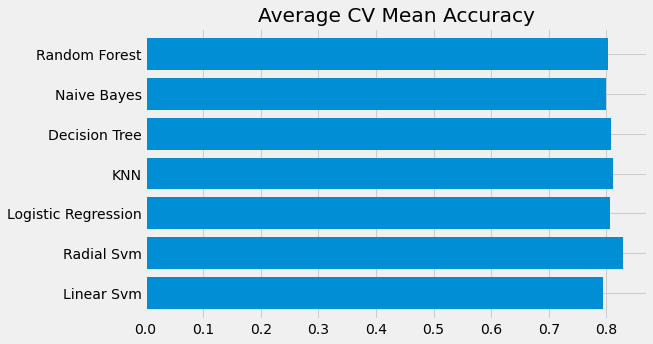

In [126]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

# Confusion matrix

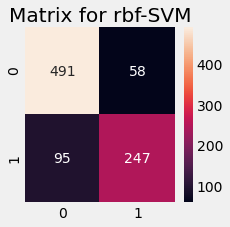

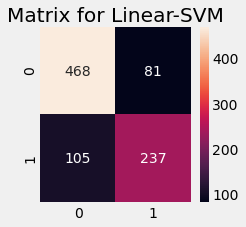

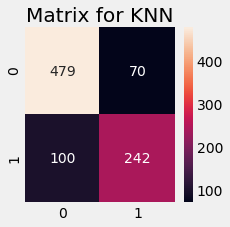

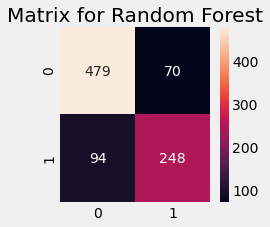

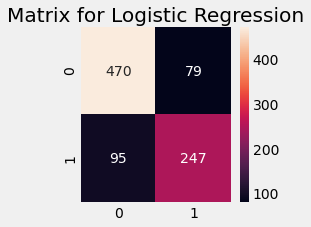

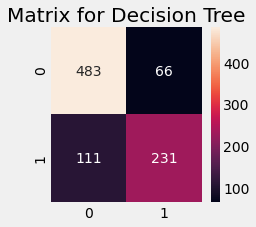

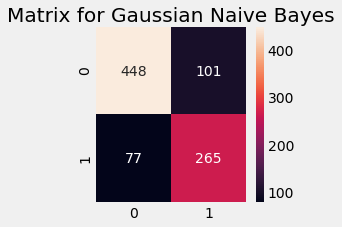

In [140]:
f, ax = plt.subplots(1,1, figsize=(3,3))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax, annot=True, fmt='2.0f')
ax.set_title('Matrix for rbf-SVM')
plt.show()

f, ax = plt.subplots(1,1, figsize=(3,3))
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax, annot=True, fmt='2.0f')
ax.set_title('Matrix for Linear-SVM')
plt.show()

f, ax = plt.subplots(1,1, figsize=(3,3))
y_pred  = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax, annot=True, fmt='2.0f')
ax.set_title('Matrix for KNN')
plt.show()

f, ax = plt.subplots(1,1, figsize=(3,3))
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax, annot=True, fmt='2.0f')
ax.set_title('Matrix for Random Forest')
plt.show()

f, ax = plt.subplots(1,1, figsize=(3,3))
y_pred = cross_val_predict(LogisticRegression(), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax, annot=True, fmt='2.0f')
ax.set_title('Matrix for Logistic Regression')
plt.show()

f, ax = plt.subplots(1,1, figsize=(3,3))
y_pred =  cross_val_predict(DecisionTreeClassifier(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax, annot=True, fmt='2.0f')
ax.set_title('Matrix for Decision Tree')
plt.show()

f, ax = plt.subplots(1,1, figsize=(3,3))
y_pred = cross_val_predict(GaussianNB(), X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax, annot=True, fmt='2.0f')
ax.set_title('Matrix for Gaussian Naive Bayes')
plt.show()

# SVM

In [142]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
gamma = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
kernel = ['rbf', 'linear']
hyper={'kernel': kernel, 'C' : C, 'gamma' : gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True, n_jobs=-1)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    4.2s


0.8293829640323898
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=-1)]: Done 1185 out of 1200 | elapsed:    4.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    4.8s finished


# Random Forests

In [143]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True, n_jobs=-1)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.7s finished


0.8159688657334756
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


# Ensembling

# Voting classifier

In [146]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                 ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                 ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                 ('LR', LogisticRegression(C=0.05)),
                                                 ('DT', DecisionTreeClassifier(random_state=0)),
                                                 ('NB', GaussianNB()),
                                                 ('svm', svm.SVC(kernel='linear', probability=True))], voting='soft', n_jobs=-1).fit(train_X, train_Y)

print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is ', cross.mean())

The accuracy for ensembled model is:  0.8246268656716418
The cross validated score is  0.8226716604244693


# Bagging

In [149]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)

print('The accuracy for bagged KNN is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is:  0.8208955223880597
The cross validated score for bagged KNN is:  0.8171660424469414


In [150]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decision Tree is:  0.8208955223880597
The cross validated score for bagged Decision Tree is:  0.8205243445692882


# Boosting

In [152]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8249188514357055


In [154]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8115230961298376


In [155]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

The cross validated score for XGBoost is:  0.8115480649188515
